<a href="https://colab.research.google.com/github/zanevc5555/physics-applets/blob/main/SpinEnsembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

Pauli Spin Matrices

#Cant be bothered re-typing this section

In [39]:
pauli_z = np.array([[1,0],[0,-1]])
pauli_x = np.array([[0,1],[1,0]])
pauli_y = np.array(((0,-1j),(1j,0)))
pauli = np.array([pauli_x, pauli_y, pauli_z])
I = np.array([[1,0],[0,1]])

print(pauli_z,pauli_x,pauli_y)

[[ 1  0]
 [ 0 -1]] [[0 1]
 [1 0]] [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]


**bold**
# Title
## Subtitle
<h3>Header



## Spinors

#### Eigenspinors

Eigenvectors of the Paul spin matrices, e.g,

$\sigma_z \bar{\phi_z} = \lambda \bar{\phi_z} = \pm \bar{\phi_z}$

$\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \left | +_z \right \rangle$

$\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix}  0 \\ 1 \end{bmatrix} = -\left | -_z \right \rangle$


**In general**, spinor is a two-level quantum state corresponding to spin orientation and is the eigenvector of the spin operator $S_n = \frac{\hbar}{2}\sigma_n$.

Form of general spinor: $[\psi(\bold{x})] = \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} = \phi_1 \left | +_z \right \rangle + \phi_2 \left | -_z \right \rangle$

*---*

## Bloch Sphere

The spin state orientation can be represented geometrically as an eigenvector on the Bloch Sphere:


![Spin state in Bloch Sphere representation](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7koXeZzlb7PsKeKZ1zc_n4Z4wFc9yhdStf4RjobHrvA&s)

$\left | 0 \right \rangle$ corresponds to the spin-up state $\left | +_z \right \rangle$ and $\left | 1 \right \rangle$ corresponds to the spin-down state $\left | -_z \right \rangle$
The Bloch state is described by two parameters; the polar angle $\theta$ and the azimuthal angle $\phi$

The direction of the Bloch state is the unit vector $\hat{n}$, also known as the Bloch vector.

In [68]:
def unitvector(theta, phi):
    if (theta < 0 or theta > np.pi or phi < 0 or phi > 2*np.pi):
        print("Invalid input")
    else:
        nx = np.sin(theta)*np.cos(phi)
        ny = np.sin(theta)*np.sin(phi)
        nz = np.cos(theta)
        return np.array([nx, ny, nz])
    
n = unitvector(np.pi/4, np.pi/4)
print(n)

[0.5        0.5        0.70710678]


The operator $A_{\pm} = \frac{1}{2} \left ( I \pm \vec{\sigma}\cdot \hat{n} \right )$ converting spin state to the corresponding Bloch states  is called the projection operator.

In [74]:
#print([n[i]*pauli[i,:,:] for i in range(n.size)])
def projop(theta, phi):
    unit = unitvector(theta, phi)
    if unit is None: return
    sigma_n = np.sum([unit[i]*pauli[i,:,:] for i in range(len(unit))], axis=0)
    A_plus = 0.5*(I + sigma_n)
    A_minus = 0.5*(I - sigma_n)
    return A_plus, A_minus

theta = np.pi/2
phi = 0
op1, op2 = projop(theta, phi)
print(op1)
print(op2)
print(op1/np.cos(theta/2))
print(op2/np.sin(theta/2))

projop(-1, -1)
       

[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]]
[[0.70710678+0.j 0.70710678+0.j]
 [0.70710678+0.j 0.70710678+0.j]]
[[ 0.70710678+0.j -0.70710678+0.j]
 [-0.70710678+0.j  0.70710678+0.j]]
Invalid input


Applying either projection operator to a spinor results in one of the Bloch states (geometric representation of spin state) of the general form:

$\frac{A_+\left | 0 \right \rangle}{\cos(\frac{\theta}{2})} = \left | \zeta_n^+ \right \rangle = \cos(\frac{\theta}{2})\left | 0 \right \rangle + \sin(\frac{\theta}{2})e^{i\phi}\left | 1 \right \rangle$;

$\frac{A_-\left | 0 \right \rangle}{\sin(\frac{\theta}{2})} =\left | \zeta_n^- \right \rangle = \sin(\frac{\theta}{2})\left | 0 \right \rangle - \cos(\frac{\theta}{2})e^{i\phi}\left | 1 \right \rangle$

In [72]:
def Bloch(theta, phi):
    #Check for valid input
    unit = unitvector(theta, phi)
    if unit is None: return
    #Bloch state formulae
    bloch_plus = [np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)]
    bloch_minus = [np.sin(theta/2), -1*np.cos(theta/2)*np.exp(1j*phi)]
    return bloch_plus, bloch_minus

spin1, spin2 = Bloch(np.pi/2, 0)
print(spin1)
print(spin2)

[0.7071067811865476, (0.7071067811865475+0j)]
[0.7071067811865475, (-0.7071067811865476+0j)]


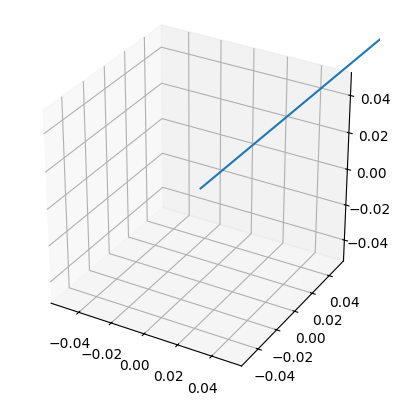

In [78]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_aspect("equal")

#draw the arrow
ax.quiver(0,0,0,1,1,1,length=1.0)

plt.show()